In [51]:
import math
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon
from common import Fonts, Images, NWSL, Colors, add_twitter_handle

In [52]:
season = 2023

In [53]:
df = pd.read_csv("data/" + str(season) + "_schedule.csv")
df["date"] = pd.to_datetime(df["date"])
df

,date,home,away,is_challenge_cup,is_playoff,home_goals,away_goals,home_penalty,away_penalty,won_on_penalties
0,2023-03-25,NC,KC,False,False,1,0,0,0,False
1,2023-03-25,SD,CHI,False,False,3,2,0,0,False
2,2023-03-26,WAS,RGN,False,False,1,0,0,0,False
3,2023-03-26,POR,ORL,False,False,4,0,0,0,False
4,2023-03-26,HOU,LOU,False,False,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...
171,2023-10-20,RGN,LA,False,True,1,0,0,0,False
172,2023-10-22,NC,NJY,False,True,0,2,0,0,False
173,2023-11-05,POR,NJY,False,True,0,1,0,0,False
174,2023-11-05,SD,RGN,False,True,0,1,0,0,False


In [54]:
# Offsets to get the location of the square
square = {
    0: [0, 0.5],
    1: [0.5, 0.5],
    2: [0.5, 0],
    3: [0, 0],
}
# Offsets to get the location of the triangle
triangle = {
    0: ([[0, 0], [0, 0.5], [0.5, 0.5]], [[0.5, 0.5], [0.5, 1], [1, 1]]),
    1: ([[0, 1], [0.5, 1], [0.5, 0.5]], [[0.5, 0.5], [1, 0], [1, 0.5]]),
    2: ([[0, 0], [0.5, 0], [0.5, 0.5]], [[0.5, 0.5], [1, 1], [1, 0.5]]),
    3: ([[0, 0.5], [0, 1], [0.5, 0.5]], [[0.5, 0], [0.5, 0.5], [1, 0]]),
}

# Index: square_colors[is_challenge_cup][is_playoff]
square_colors = [
    # [regular, playoff]
    ["darkgray", "#ebeded"], # Regular season
    ["lightgray", "#ebeded"], # Challenge cup
]

def color(team):
    if team == "KC":
        return "#cf3339"
    elif team == "NJY":
        return "#a9f1f5"
    else:
        return NWSL.color(team)

# Draw individual match
def draw_match(ax, match, row, col):
    home = color(match["home"])
    away = color(match["away"])
    s = square_colors[match["is_challenge_cup"]][match["is_playoff"]]
    t0 = s
    t1 = home
    t2 = away
    if match["home_goals"] > match["away_goals"]:
        t0 = home
        t1 = away
        t2 = away
    elif match["home_goals"] < match["away_goals"]:
        t0 = away
        t1 = home
        t2 = home
    
    
    orient = (col % 2) + ((row ) % 2) * 2
    # Draw background square (big triangle)
    ax.add_patch(Rectangle((0, 0), 1, 1, color=t0))
    # Draw first triangle
    ax.add_patch(Polygon(triangle[orient][0], color=t1))
    # Draw second triangle
    ax.add_patch(Polygon(triangle[orient][1], color=t2))
    # Draw small square
    ax.add_patch(Rectangle(square[orient], 0.5, 0.5, color=s))

<Figure size 432x288 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

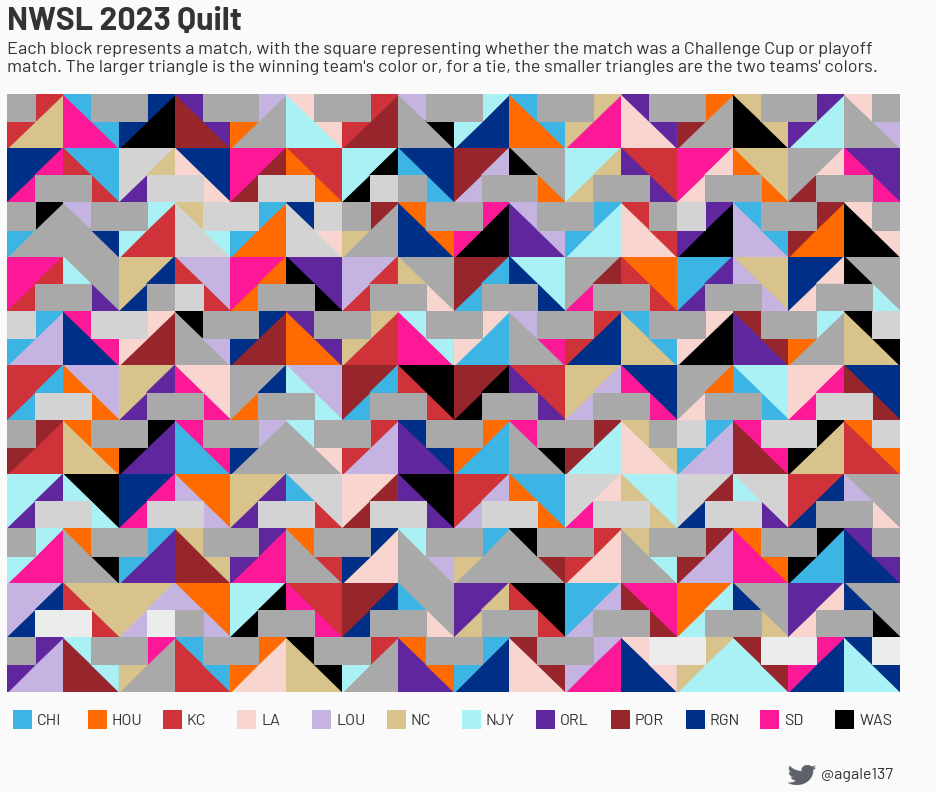

In [55]:
# Setup
plt.clf()
plt.figure(dpi=200)
cols = 16
rows = 11 + 1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(cols, rows))
fig.patch.set_facecolor(Colors.WHITE)
plt.subplots_adjust(wspace=0, hspace=0)

# Draw the plot
for i, match in df.iterrows():
    col = i % cols
    row = math.floor(i / cols)
    ax = axs[row, col]
    # ax.set_facecolor(Colors.WHITE)
    ax.axis("off")
    draw_match(ax, match, row, col)

# Draw the legend
teams = sorted(df["home"].unique())
for i in range(0, len(teams)):
    axs[rows - 1, 0].text(
        i * 0.75,
        0.5,
        teams[i],
        va="center",
        fontproperties=Fonts.BARLOW,
        size=16,
        ha="left",
        color=Colors.BLACK,
    )

    axs[rows - 1, 0].scatter(
        [i * 0.75 - 0.15],
        [0.502],
        color=color(teams[i]),
        s=300,
        clip_on=False,
        marker="s",
    )
axs[rows - 1, 0].set_xlim([-0.3, 0.26])

for i in range(0, cols):
    axs[rows - 1, i].axis("off")

# Title
fig.suptitle(
    "NWSL " + str(season) + " Quilt",
    x=0.125,
    y=0.98,
    fontproperties=Fonts.BARLOW_BOLD,
    size=32,
    ha="left",
    color=Colors.BLACK,
)

# Subtitle
ax.text(
    -15,
    11.4,
    "Each block represents a match, with the square representing whether the match was a Challenge Cup or playoff\nmatch. The larger triangle is the winning team's color or, for a tie, the smaller triangles are the two teams' colors.",
    fontproperties=Fonts.BARLOW,
    size=18,
    ha="left",
    color=Colors.BLACK,
)

# Twitter logo and username
add_twitter_handle(fig, x=0.8, y=0.08, fs=16, w=0.025)

# Save image
plt.savefig(str(season) + "_season_quilt.png", bbox_inches="tight", pad_inches=0.5)